<a href="https://colab.research.google.com/github/hepvarbifikri/istanbuldatascienceacademy/blob/main/Tez2_daily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

            PTF (USD/MWh)  HES_Uretim
Tarih_Saat                           
2017-01-01      27.813750   31.684167
2017-01-02      40.087500   56.477500
2017-01-03      46.856250  202.940417
2017-01-04      48.550833  128.352500
2017-01-05      43.700417   42.655417
2017-01-06      48.987083   97.644583
2017-01-07      54.902917   72.000417
2017-01-08      41.426667   93.685417
2017-01-09      50.309583  150.928750
2017-01-10      54.982500  221.463333
2017-01-11      50.471667   40.551250
2017-01-12      51.268333   55.724583
2017-01-13      55.377083   87.910000
2017-01-14      45.790833  129.822500
2017-01-15      42.204167  108.692083
2017-01-16      50.178333   77.379583
2017-01-17      45.696250   88.145000
2017-01-18      45.255417   87.645000
2017-01-19      45.281667   78.674583
2017-01-20      40.477500  101.340833


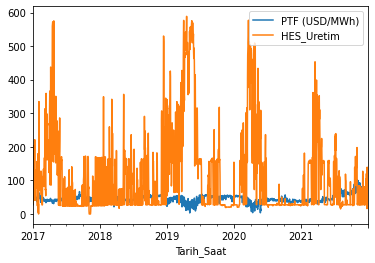

In [52]:
# line plot of time series
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
# load dataset
#series = read_csv('/content/EXIST_df_17_21_d', header=0, index_col=0)
# Read the datasets

series = pd.read_pickle("/content/EXIST_df_17_21_d")
# display first few rows
print(series.head(20))
# line plot of dataset
series.plot()
pyplot.show()

In [57]:
real_22 = pd.read_pickle("/content/EXIST_df_22_d")
real_22.drop(columns='HES_Uretim', inplace=True)
real_22

,PTF (USD/MWh)
Tarih_Saat,
2022-01-01,82.115417
2022-01-02,77.572500
2022-01-03,87.729167
2022-01-04,88.022500
2022-01-05,82.099583
...,...
2022-09-27,194.245000
2022-09-28,200.908333
2022-09-29,199.652500


In [53]:
series.drop(columns='HES_Uretim', inplace=True)

In [6]:
series

,PTF (USD/MWh)
Tarih_Saat,
2017-01-01,27.813750
2017-01-02,40.087500
2017-01-03,46.856250
2017-01-04,48.550833
2017-01-05,43.700417
...,...
2021-12-27,91.775417
2021-12-28,91.507917
2021-12-29,96.584583


In [7]:
# split the dataset
from pandas import read_csv
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

Dataset 1819, Validation 7


In [8]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# load dataset
series = read_csv('dataset.csv', header=0)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()
# print summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1454
Model:                 ARIMA(7, 0, 1)   Log Likelihood               -4813.587
Date:                Thu, 15 Dec 2022   AIC                           9647.173
Time:                        10:40:09   BIC                           9699.994
Sample:                             0   HQIC                          9666.882
                               - 1454                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4258      4.211      0.576      0.565      -5.828      10.679
ar.L1          0.0225      0.030      0.755      0.450      -0.036       0.081
ar.L2          0.2964      0.022     13.633      0.0

In [9]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load dataset
series = read_csv('dataset.csv', header=0)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 75.368323


In [10]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy
from pandas import datetime

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load dataset
series = read_csv('dataset.csv', header=0)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()
# one-step out of sample forecast
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

<ipython-input-10-48f89097e058>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Forecast: 75.368323


In [55]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy

# create a differenced series
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
  return yhat + history[-interval]

# load dataset
series = read_csv('dataset.csv', header=0)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=274)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
tahmin = list()
for yhat in forecast:
  inverted = inverse_difference(history, yhat, days_in_year)
  print('Day %d: %f' % (day, inverted))
  history.append(inverted)
  day += 1
  tahmin.append(inverted)


Day 1: 75.368323
Day 2: 68.917298
Day 3: 70.889784
Day 4: 71.200409
Day 5: 65.639761
Day 6: 72.747125
Day 7: 72.701063
Day 8: 68.071082
Day 9: 70.287835
Day 10: 70.814071
Day 11: 71.033275
Day 12: 66.649664
Day 13: 71.519337
Day 14: 70.287072
Day 15: 69.283170
Day 16: 66.136498
Day 17: 66.070962
Day 18: 68.043764
Day 19: 67.172431
Day 20: 70.260194
Day 21: 70.906919
Day 22: 68.488479
Day 23: 68.411747
Day 24: 64.850246
Day 25: 67.554535
Day 26: 67.745532
Day 27: 68.805951
Day 28: 68.224044
Day 29: 67.417836
Day 30: 63.353181
Day 31: 61.288176
Day 32: 62.177423
Day 33: 62.484684
Day 34: 62.972517
Day 35: 66.148994
Day 36: 64.336498
Day 37: 60.590449
Day 38: 58.475963
Day 39: 58.947614
Day 40: 60.602558
Day 41: 62.836721
Day 42: 62.323192
Day 43: 61.790970
Day 44: 58.931078
Day 45: 55.846696
Day 46: 57.335748
Day 47: 57.925308
Day 48: 57.538859
Day 49: 56.889170
Day 50: 59.714078
Day 51: 56.369990
Day 52: 52.604126
Day 53: 57.793682
Day 54: 59.250761
Day 55: 59.989871
Day 56: 62.096273
D

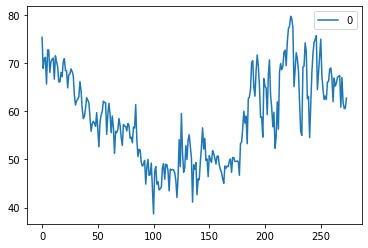

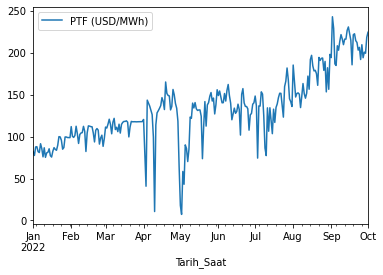

In [60]:
df = pd.DataFrame(tahmin)
df.astype(float)
df.plot()
real_22.plot()
pyplot.show()

In [82]:
real_22['tahmin'] = tahmin
real_22['tahmin'] = real_22['tahmin'].astype(float)

In [83]:
real_22.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2022-01-01 to 2022-10-01
Freq: D
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PTF (USD/MWh)  274 non-null    float64
 1   tahmin         274 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


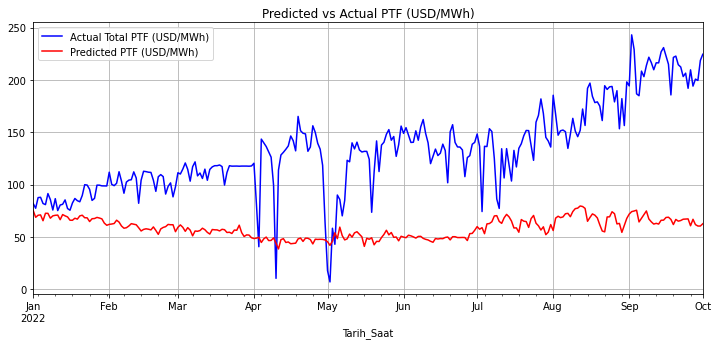

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.xlabel("Date")

ax1 = real_22["PTF (USD/MWh)"].plot(color= "blue", grid = True, label = "Actual Total PTF (USD/MWh)")
ax2 = real_22["tahmin"].plot(color= "red", grid = True, label = "Predicted PTF (USD/MWh)")

ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title( "Predicted vs Actual PTF (USD/MWh)")
plt.show()

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

#Checking the Root Mean Square Error

for i in range(274):
    print('RMSE for', i, 'is: ', sqrt(mean_squared_error(real_22['PTF (USD/MWh)'][i], real_22['tahmin'][i])))

TypeError: ignored

In [75]:
tahmin = real_22['tahmin']

In [76]:
type(tahmin)

pandas.core.series.Series

In [77]:
real_22.drop(columns='tahmin',inplace=True)

In [78]:
type(real_22)

pandas.core.frame.DataFrame

In [13]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load dataset
series = read_csv('dataset.csv', header=0)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: 75.368323
Day 2: 68.917298
Day 3: 70.889784
Day 4: 71.200409
Day 5: 65.639761
Day 6: 72.747125
Day 7: 72.701063
